🔍 Available Columns: ['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course', 'math_score', 'reading_score', 'writing_score', 'average_score']
✅ All required columns exist! Proceeding with analysis...


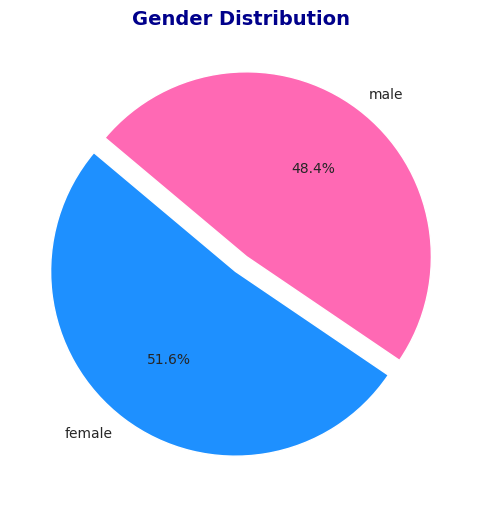

<ipython-input-13-5d48e65cfed9>:59: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




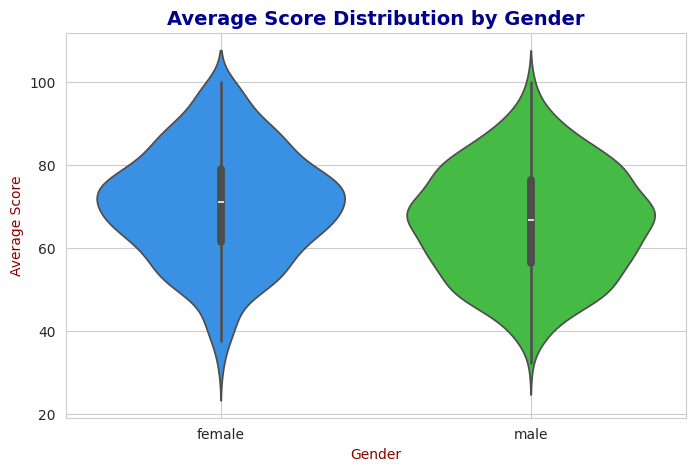

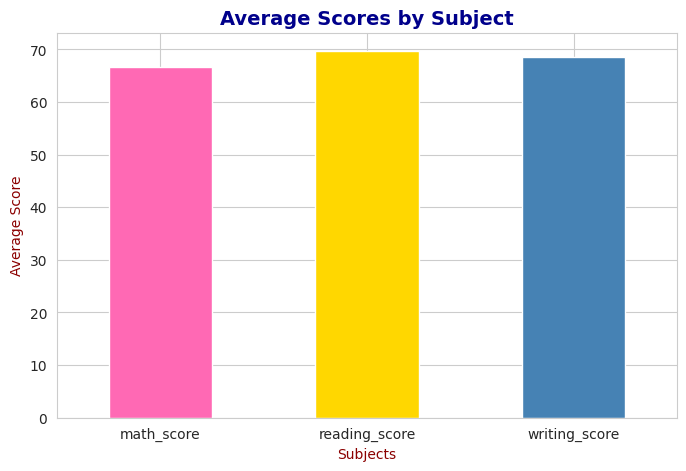

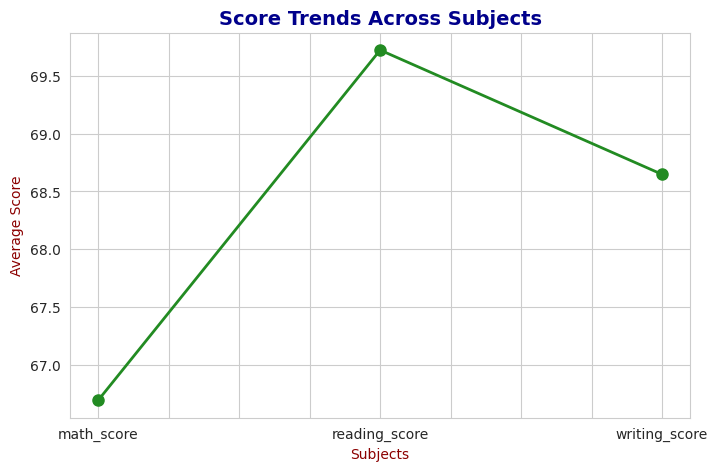

<ipython-input-13-5d48e65cfed9>:94: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




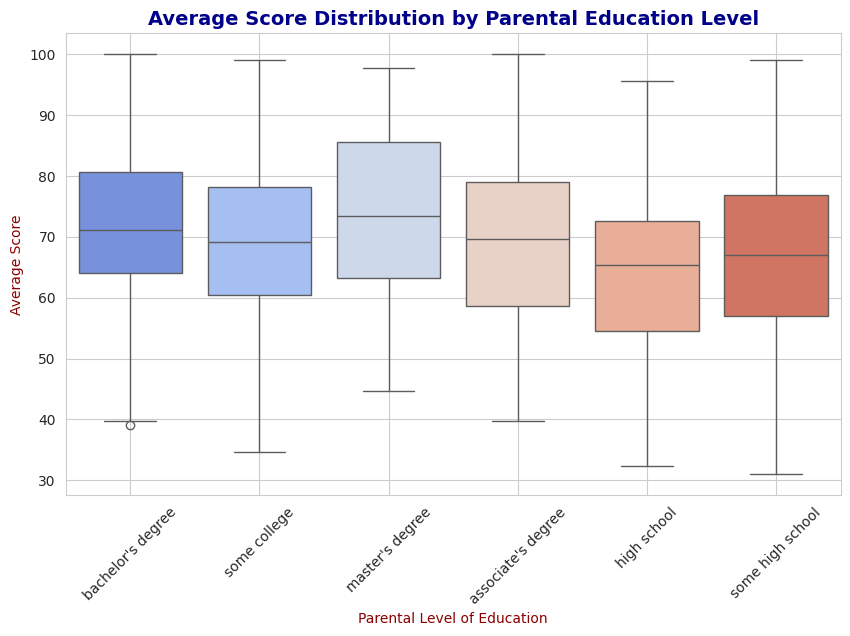


✅ Data Analysis & Visualizations Completed Successfully!
📁 Summary statistics saved at: Question_2/Analysis/summary_statistics.csv
📁 Gender distribution pie chart saved at: Question_2/Visualizations/gender_distribution_pie_chart.png
📁 Gender average score violin plot saved at: Question_2/Visualizations/gender_average_score_violin_plot.png
📁 Subject average score chart saved at: Question_2/Visualizations/subject_average_scores.png
📁 Score trends line plot saved at: Question_2/Visualizations/score_trends_line_plot.png
📁 Parental education vs score boxplot saved at: Question_2/Visualizations/parental_education_vs_score_boxplot.png
📁 Gender performance analysis saved at: Question_2/Analysis/gender_performance_analysis.txt


In [13]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Set a custom Seaborn theme for better visualization
sns.set_style("whitegrid")

# Step 1: Load the Cleaned Dataset
base_folder = "Question_2"
cleaned_folder = os.path.join(base_folder, "Cleaned_Data")
analysis_folder = os.path.join(base_folder, "Analysis")
visualizations_folder = os.path.join(base_folder, "Visualizations")

# Create necessary directories
os.makedirs(analysis_folder, exist_ok=True)
os.makedirs(visualizations_folder, exist_ok=True)

cleaned_file_path = os.path.join(cleaned_folder, "/content/data/student_performance_cleaned_unique.csv")

# Check if the file exists
if not os.path.exists(cleaned_file_path):
    raise FileNotFoundError(f"❌ Error: Cleaned dataset '{cleaned_file_path}' not found. Run the data cleaning script first.")

df = pd.read_csv(cleaned_file_path)

# Step 2: Fix Column Names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")  # Standardize column names
print("🔍 Available Columns:", df.columns.tolist())  # Debugging step

# Step 3: Ensure Necessary Columns Exist
expected_columns = ['average_score', 'gender', 'math_score', 'reading_score', 'writing_score', 'parental_level_of_education']
missing_columns = [col for col in expected_columns if col not in df.columns]

if missing_columns:
    raise KeyError(f"❌ Error: Missing columns in dataset: {missing_columns}. Check dataset and update script.")

print("✅ All required columns exist! Proceeding with analysis...")

# Step 4: Summary Statistics
summary_stats = df.describe()
summary_path = os.path.join(analysis_folder, "summary_statistics.csv")
summary_stats.to_csv(summary_path)

# Step 5: Visualization 1 - Pie Chart for Gender Distribution
plt.figure(figsize=(6, 6))
gender_counts = df['gender'].value_counts()
colors = ['#1E90FF', '#FF69B4']  # Blue & Pink
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=colors, startangle=140, explode=[0.05, 0.05])
plt.title('Gender Distribution', fontsize=14, fontweight='bold', color='darkblue')
gender_pie_chart_path = os.path.join(visualizations_folder, "gender_distribution_pie_chart.png")
plt.savefig(gender_pie_chart_path, dpi=300)
plt.show()

# Step 6: Visualization 2 - Gender-Based Score Comparison (Violin Plot)
plt.figure(figsize=(8, 5))
sns.violinplot(x=df['gender'], y=df['average_score'], palette=['#1E90FF', '#32CD32'])  # Blue & Green
plt.title('Average Score Distribution by Gender', fontsize=14, fontweight='bold', color='darkblue')
plt.xlabel('Gender', color='darkred')
plt.ylabel('Average Score', color='darkred')
plt.grid(True)
violin_plot_path = os.path.join(visualizations_folder, "gender_average_score_violin_plot.png")
plt.savefig(violin_plot_path, dpi=300)
plt.show()

# Step 7: Visualization 3 - Subject-Wise Score Comparison (Custom Bar Colors)
plt.figure(figsize=(8, 5))
df[['math_score', 'reading_score', 'writing_score']].mean().plot(kind='bar', color=['#FF69B4', '#FFD700', '#4682B4'])  # Pink, Gold, Steel Blue
plt.title('Average Scores by Subject', fontsize=14, fontweight='bold', color='darkblue')
plt.xlabel('Subjects', color='darkred')
plt.ylabel('Average Score', color='darkred')
plt.xticks(rotation=0)
plt.grid(True)
subject_bar_chart_path = os.path.join(visualizations_folder, "subject_average_scores.png")
plt.savefig(subject_bar_chart_path, dpi=300)
plt.show()

# Step 8: Visualization 4 - Line Plot of Score Trends Across Subjects
plt.figure(figsize=(8, 5))
df[['math_score', 'reading_score', 'writing_score']].mean().plot(kind='line', marker='o', linestyle='-', color='#228B22', linewidth=2, markersize=8)  # Green
plt.title('Score Trends Across Subjects', fontsize=14, fontweight='bold', color='darkblue')
plt.xlabel('Subjects', color='darkred')
plt.ylabel('Average Score', color='darkred')
plt.xticks(rotation=0)
plt.grid(True)
score_trends_path = os.path.join(visualizations_folder, "score_trends_line_plot.png")
plt.savefig(score_trends_path, dpi=300)
plt.show()

# Step 9: Visualization 5 - Boxplot of Scores by Parental Education Level (Custom Color Palette)
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['parental_level_of_education'], y=df['average_score'], palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Average Score Distribution by Parental Education Level', fontsize=14, fontweight='bold', color='darkblue')
plt.xlabel('Parental Level of Education', color='darkred')
plt.ylabel('Average Score', color='darkred')
plt.grid(True)
education_boxplot_path = os.path.join(visualizations_folder, "parental_education_vs_score_boxplot.png")
plt.savefig(education_boxplot_path, dpi=300)
plt.show()

# Step 10: Gender-Based Performance Hypothesis Testing (T-Test)
male_scores = df[df['gender'] == 'male']['average_score']
female_scores = df[df['gender'] == 'female']['average_score']

t_stat, p_value = ttest_ind(male_scores, female_scores, equal_var=False)

gender_analysis = f"""
📊 **Gender-Based Performance Analysis**
- **Mean Male Score:** {male_scores.mean():.2f}
- **Mean Female Score:** {female_scores.mean():.2f}
- **T-test Statistic:** {t_stat:.4f}
- **P-value:** {p_value:.4f}
"""

gender_analysis_path = os.path.join(analysis_folder, "gender_performance_analysis.txt")
with open(gender_analysis_path, "w") as file:
    file.write(gender_analysis)

# Step 11: Save and Display Insights
print("\n✅ Data Analysis & Visualizations Completed Successfully!")
print(f"📁 Summary statistics saved at: {summary_path}")
print(f"📁 Gender distribution pie chart saved at: {gender_pie_chart_path}")
print(f"📁 Gender average score violin plot saved at: {violin_plot_path}")
print(f"📁 Subject average score chart saved at: {subject_bar_chart_path}")
print(f"📁 Score trends line plot saved at: {score_trends_path}")
print(f"📁 Parental education vs score boxplot saved at: {education_boxplot_path}")
print(f"📁 Gender performance analysis saved at: {gender_analysis_path}")
